# Plot S4 vs time in function of: frequency and constelation v2.0
### It includes elevation info, data is filtered for elev>35º, and then it is filtered again for s4>0.3
### Corrections given by Cesar Valladares is also done
Target:
![plot_s4_v2](plot_s4_v2.png)

In [1]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

## 1) Import scintilacion files (.s4)  

In [2]:
directorio = "/home/luis/Desktop/Proyects_Files/LISN/GPSs/Tareas/Graficas_cintilaciones/Input_data/Data_procesada/"
file_name = "ljic_200926.s4"
df1 = pd.read_csv(directorio + file_name, header=None, sep="\t")
df1.head(3)

/home/luis/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7,8,13,14,15,16,31,32,37,38,103,104,109,110,111,112,113,127,128,129,130,134,135,138,139,153,154,160,162,163,164,199,200,205,206,207,208,223,224,229,230,247,248,253,254,255,256,271,272,277,278,295,296,297,298,301,302,303,304,306,307,369,370,378,379,415,416,421,422,423,463,464,469,470,471,472,473,511,512,517,518,519,520,521,544,545,583,584,589,590,591,592,593,607,608,613,614,615,616,631,632,637,638,655,656,661,662,663,664,665,679,680,683,684,685,686,695,696,697,703,704,707,708,709,710,711,712,719,720,721,722,731,732,743,744,745,751,752,755,756,757,758,767,768,806,807,808,809,817,818,819,820,825,826,834,835,836,837,838,844,849,850,858,859,860,861,862,868,871,872,873,874,877,878,879,880,881,882,883,884,885,886,891,892,897,898,906,907,908,909,910) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=resul

,0,1,2,3,4,5,6,7,8,9,...,906,907,908,909,910,911,912,913,914,915
0,20,270,60,35,G10,99.0,72.0,0.023,0.025,0.042,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20,270,120,35,G10,101.0,72.0,0.022,0.024,0.036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20,270,180,35,G10,102.0,72.0,0.023,0.025,0.035,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Columns: 916 entries, 0 to 915
dtypes: float64(161), int64(4), object(751)
memory usage: 10.1+ MB


## 2. Process the dataframe

In [4]:
# Eliminacion de ciertas columnas
for i in df1.columns:
    if i>3:
        m = (i-4)%24
        #if m == 1: del df1[i] # delete azimuth
        #elif m == 2: del df1[i] # delete elevation
        if m >= 9: del df1[i]

df1.head()

,0,1,2,3,4,5,6,7,8,9,...,876,892,893,894,895,896,897,898,899,900
0,20,270,60,35,G10,99.0,72.0,0.023,0.025,0.042,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20,270,120,35,G10,101.0,72.0,0.022,0.024,0.036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20,270,180,35,G10,102.0,72.0,0.023,0.025,0.035,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20,270,240,35,G10,104.0,72.0,0.023,0.025,0.042,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20,270,300,35,G10,105.0,71.0,0.020,0.024,0.036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Columns: 346 entries, 0 to 900
dtypes: float64(104), int64(4), object(238)
memory usage: 3.8+ MB


In [6]:
df1.columns = np.arange(len(df1.columns)) # Rename the columns 
df1.head(2)

,0,1,2,3,4,5,6,7,8,9,...,336,337,338,339,340,341,342,343,344,345
0,20,270,60,35,G10,99.0,72.0,0.023,0.025,0.042,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20,270,120,35,G10,101.0,72.0,0.022,0.024,0.036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Creacion de un nuevo dataframe
df2 = pd.DataFrame(columns=range(12))

# Se llenan el resto de valores
T = 9 # Period of dataset
for i in range(len(df1)):
    for h in range(df1.iloc[i,3]): # that cell contains the number of measurements 
        m = df1.iloc[i,[0, 1, 2, 4+T*h, 5+T*h, 6+T*h, 7+T*h, 8+T*h, 9+T*h, 10+T*h, 11+T*h, 12+T*h]]
        m.index = range(len(m))
        df2 = df2.append(m)

df2.index = range(len(df2))
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,20,270,60,G10,99.0,72.0,0.023,0.025,0.042,0.036,0.023,0.023
1,20,270,60,G16,214.0,49.0,0.075,0.039,nan,nan,nan,nan
2,20,270,60,G20,138.0,40.0,0.111,0.051,nan,nan,nan,nan
3,20,270,60,G21,257.0,33.0,0.103,0.060,nan,nan,nan,nan
4,20,270,60,G26,314.0,83.0,0.025,0.029,0.035,0.036,0.021,0.022


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46199 entries, 0 to 46198
Data columns (total 12 columns):
0     46199 non-null object
1     46199 non-null object
2     46199 non-null object
3     46199 non-null object
4     46198 non-null float64
5     46198 non-null float64
6     46199 non-null object
7     46199 non-null object
8     46199 non-null object
9     46199 non-null object
10    46199 non-null object
11    46199 non-null object
dtypes: float64(2), object(10)
memory usage: 4.2+ MB


In [9]:
# Change type object to double 
for i in range(3):
    df2[i] = df2[i].astype("int")

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46199 entries, 0 to 46198
Data columns (total 12 columns):
0     46199 non-null int64
1     46199 non-null int64
2     46199 non-null int64
3     46199 non-null object
4     46198 non-null float64
5     46198 non-null float64
6     46199 non-null object
7     46199 non-null object
8     46199 non-null object
9     46199 non-null object
10    46199 non-null object
11    46199 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 4.2+ MB


In [11]:
# Change data type to str and then to float
for i in range(6):
    df2[6+i] = df2[6+i].astype("str").str.strip().astype("float")
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,20,270,60,G10,99.0,72.0,0.023,0.025,0.042,0.036,0.023,0.023
1,20,270,60,G16,214.0,49.0,0.075,0.039,NaN,NaN,NaN,NaN
2,20,270,60,G20,138.0,40.0,0.111,0.051,NaN,NaN,NaN,NaN
3,20,270,60,G21,257.0,33.0,0.103,0.060,NaN,NaN,NaN,NaN
4,20,270,60,G26,314.0,83.0,0.025,0.029,0.035,0.036,0.021,0.022


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46199 entries, 0 to 46198
Data columns (total 12 columns):
0     46199 non-null int64
1     46199 non-null int64
2     46199 non-null int64
3     46199 non-null object
4     46198 non-null float64
5     46198 non-null float64
6     46046 non-null float64
7     46046 non-null float64
8     32202 non-null float64
9     32202 non-null float64
10    24368 non-null float64
11    24368 non-null float64
dtypes: float64(8), int64(3), object(1)
memory usage: 4.2+ MB


In [13]:
# Rename columns 
df2.columns = ["YY", "DOY", "SOD", "PRN", "Azimuth", "Elevation", "S4_sig1", "S4_sig1_corr", "S4_sig2", "S4_sig2_corr", "S4_sig3", "S4_sig3_corr"]
df2.head()

,YY,DOY,SOD,PRN,Azimuth,Elevation,S4_sig1,S4_sig1_corr,S4_sig2,S4_sig2_corr,S4_sig3,S4_sig3_corr
0,20,270,60,G10,99.0,72.0,0.023,0.025,0.042,0.036,0.023,0.023
1,20,270,60,G16,214.0,49.0,0.075,0.039,NaN,NaN,NaN,NaN
2,20,270,60,G20,138.0,40.0,0.111,0.051,NaN,NaN,NaN,NaN
3,20,270,60,G21,257.0,33.0,0.103,0.060,NaN,NaN,NaN,NaN
4,20,270,60,G26,314.0,83.0,0.025,0.029,0.035,0.036,0.021,0.022


In [14]:
# Calculate the corrected S4
def get_correctedS4(row):
    s4 = row[0]
    correction= row[1]
    
    # Treat nan numbers 
    if pd.isnull(s4) or pd.isnull(correction):
        return np.nan
    else:
        # Calculate the corrected S4
        x = s4**2-correction**2
        if x>0:
            return x**0.5
        else:
            return 0    

for i in range(3):        
    df2[f"S4_sig{i+1}"] = df2[[f"S4_sig{i+1}",f"S4_sig{i+1}_corr"]].apply(get_correctedS4, axis=1)
df2.head()

,YY,DOY,SOD,PRN,Azimuth,Elevation,S4_sig1,S4_sig1_corr,S4_sig2,S4_sig2_corr,S4_sig3,S4_sig3_corr
0,20,270,60,G10,99.0,72.0,0.000000,0.025,0.021633,0.036,0.0,0.023
1,20,270,60,G16,214.0,49.0,0.064062,0.039,NaN,NaN,NaN,NaN
2,20,270,60,G20,138.0,40.0,0.098590,0.051,NaN,NaN,NaN,NaN
3,20,270,60,G21,257.0,33.0,0.083720,0.060,NaN,NaN,NaN,NaN
4,20,270,60,G26,314.0,83.0,0.000000,0.029,0.000000,0.036,0.0,0.022


In [15]:
# Delete some columns
del df2["S4_sig1_corr"]
del df2["S4_sig2_corr"]
del df2["S4_sig3_corr"]
df2.head()

,YY,DOY,SOD,PRN,Azimuth,Elevation,S4_sig1,S4_sig2,S4_sig3
0,20,270,60,G10,99.0,72.0,0.000000,0.021633,0.0
1,20,270,60,G16,214.0,49.0,0.064062,NaN,NaN
2,20,270,60,G20,138.0,40.0,0.098590,NaN,NaN
3,20,270,60,G21,257.0,33.0,0.083720,NaN,NaN
4,20,270,60,G26,314.0,83.0,0.000000,0.000000,0.0


In [16]:
# Sort values by "PRN" and "SOD" 
df2 = df2.sort_values(["PRN","SOD"])

# Reindex in ascendent order 
df2.index = range(len(df2))

df2

,YY,DOY,SOD,PRN,Azimuth,Elevation,S4_sig1,S4_sig2,S4_sig3
0,20,270,31380,C14,229.0,12.0,NaN,0.000000,0.069426
1,20,270,31440,C14,229.0,12.0,0.000000,0.097627,0.073157
2,20,270,31500,C14,229.0,12.0,0.121017,0.091929,0.093118
3,20,270,31560,C14,228.0,12.0,0.000000,0.051962,0.044227
4,20,270,31620,C14,228.0,12.0,0.028636,0.027111,0.078708
5,20,270,31680,C14,227.0,12.0,0.000000,0.104499,0.042249
6,20,270,31740,C14,227.0,12.0,0.000000,0.027857,0.014933
7,20,270,31800,C14,227.0,13.0,0.033451,0.060893,0.036497
8,20,270,31860,C14,226.0,13.0,0.000000,0.013077,0.028566
9,20,270,31920,C14,226.0,13.0,0.064062,0.069914,0.034641


In [17]:
# Convert to datetime data type 
def change2datetime(row):
    yy = int(row[0])
    doy = int(row[1])
    sod = int(row[2])
    
    if sod < 0: 
        doy = doy -1
        sod = 60*60*24+sod      
    
    cdate = str(yy)+"-"+str(doy)+"-"+str(datetime.timedelta(seconds=sod))
    fecha = datetime.datetime.strptime(cdate, "%y-%j-%X")
    
    return fecha  

# Convert and assign
m = df2.apply(change2datetime, axis=1)

# Create the new column
df2.insert(0,column="DateTime",value=0)
df2["DateTime"] = m

# Delete some columns 
del df2["YY"]
del df2["DOY"]
del df2["SOD"]

df2

,DateTime,PRN,Azimuth,Elevation,S4_sig1,S4_sig2,S4_sig3
0,2020-09-26 08:43:00,C14,229.0,12.0,NaN,0.000000,0.069426
1,2020-09-26 08:44:00,C14,229.0,12.0,0.000000,0.097627,0.073157
2,2020-09-26 08:45:00,C14,229.0,12.0,0.121017,0.091929,0.093118
3,2020-09-26 08:46:00,C14,228.0,12.0,0.000000,0.051962,0.044227
4,2020-09-26 08:47:00,C14,228.0,12.0,0.028636,0.027111,0.078708
5,2020-09-26 08:48:00,C14,227.0,12.0,0.000000,0.104499,0.042249
6,2020-09-26 08:49:00,C14,227.0,12.0,0.000000,0.027857,0.014933
7,2020-09-26 08:50:00,C14,227.0,13.0,0.033451,0.060893,0.036497
8,2020-09-26 08:51:00,C14,226.0,13.0,0.000000,0.013077,0.028566
9,2020-09-26 08:52:00,C14,226.0,13.0,0.064062,0.069914,0.034641


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46199 entries, 0 to 46198
Data columns (total 7 columns):
DateTime     46199 non-null datetime64[ns]
PRN          46199 non-null object
Azimuth      46198 non-null float64
Elevation    46198 non-null float64
S4_sig1      46046 non-null float64
S4_sig2      32202 non-null float64
S4_sig3      24368 non-null float64
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 2.5+ MB


In [19]:
df2.set_index("DateTime", inplace=True)
df2.head()

,PRN,Azimuth,Elevation,S4_sig1,S4_sig2,S4_sig3
DateTime,,,,,,
2020-09-26 08:43:00,C14,229.0,12.0,NaN,0.000000,0.069426
2020-09-26 08:44:00,C14,229.0,12.0,0.000000,0.097627,0.073157
2020-09-26 08:45:00,C14,229.0,12.0,0.121017,0.091929,0.093118
2020-09-26 08:46:00,C14,228.0,12.0,0.000000,0.051962,0.044227
2020-09-26 08:47:00,C14,228.0,12.0,0.028636,0.027111,0.078708


In [20]:
df2_copy = df2.copy()

### Filtering S4 data based on the angle and the S4 value

In [21]:
def filter_elev_s4(row):
    elev = row[0]
    s4 = row[1]
    threshold_s4 = 0.3
    threshold_elev = 35 # Unit: º
    
    if elev < threshold_elev:
        return [s4, np.nan, np.nan]
    elif s4 < threshold_s4:
        return [np.nan, s4, np.nan]
    else:
        return [np.nan, np.nan, s4]

In [22]:
#df2_aux = df2.copy()

for j in range(3):
    j += 1
    df_aux = df2[["Elevation", f"S4_sig{j}"]].apply(filter_elev_s4, axis=1, result_type="expand")
    df_aux.rename(columns={0:f"S4_sig{j}_1", 1:f"S4_sig{j}_2", 2:f"S4_sig{j}_3"}, inplace=True)
    df2 = pd.concat([df2, df_aux], join='inner', axis=1)
    #del df2_aux[f"S4_sig{j}"]

In [23]:
print(len(df2))
df2.head()

46199


,PRN,Azimuth,Elevation,S4_sig1,S4_sig2,S4_sig3,S4_sig1_1,S4_sig1_2,S4_sig1_3,S4_sig2_1,S4_sig2_2,S4_sig2_3,S4_sig3_1,S4_sig3_2,S4_sig3_3
DateTime,,,,,,,,,,,,,,,
2020-09-26 08:43:00,C14,229.0,12.0,NaN,0.000000,0.069426,NaN,NaN,NaN,0.000000,NaN,NaN,0.069426,NaN,NaN
2020-09-26 08:44:00,C14,229.0,12.0,0.000000,0.097627,0.073157,0.000000,NaN,NaN,0.097627,NaN,NaN,0.073157,NaN,NaN
2020-09-26 08:45:00,C14,229.0,12.0,0.121017,0.091929,0.093118,0.121017,NaN,NaN,0.091929,NaN,NaN,0.093118,NaN,NaN
2020-09-26 08:46:00,C14,228.0,12.0,0.000000,0.051962,0.044227,0.000000,NaN,NaN,0.051962,NaN,NaN,0.044227,NaN,NaN
2020-09-26 08:47:00,C14,228.0,12.0,0.028636,0.027111,0.078708,0.028636,NaN,NaN,0.027111,NaN,NaN,0.078708,NaN,NaN


In [24]:
#df2.to_csv("rawData2.csv")

Congratulations! The dataframe is ready to plot (y)

## 3. Plot for each frequency and constellation

In [25]:
# Identify the available PRNs
prns = df2["PRN"].str[0].unique() # extract the first character of each cell 
#prns = prns[0]
#prns = prns[-1]
prns

array(['C', 'E', 'G', 'R', 'S'], dtype=object)

In [26]:
# Get file date
file_name = "ljic_200926.s4"
fecha = file_name[5:-3]
fecha2 = datetime.datetime.strptime(fecha, "%y%m%d")
fecha3 = datetime.datetime.strftime(fecha2,"%Y/%m/%d")
fecha2

datetime.datetime(2020, 9, 26, 0, 0)

In [27]:
fecha2_tomorrow = fecha2 + pd.DateOffset(days=1)
fecha2_tomorrow = fecha2_tomorrow.to_pydatetime()
fecha2_tomorrow

datetime.datetime(2020, 9, 27, 0, 0)

In [39]:
# Get UTC day range, for add a vertical span
fecha_morning_first = fecha2 + pd.DateOffset(hours=11)
fecha_morning_first = fecha_morning_first.to_pydatetime()
fecha_morning_first

datetime.datetime(2020, 9, 26, 11, 0)

In [41]:
fecha_morning_last = fecha2 + pd.DateOffset(hours=23)
fecha_morning_last = fecha_morning_last.to_pydatetime()
fecha_morning_last

datetime.datetime(2020, 9, 26, 23, 0)

In [28]:
# Get the name for a given PRN code
def get_prn_name(prn_code):
    if prn_code == 'G': return 'GPS'
    elif prn_code == 'R': return 'GLONASS'
    elif prn_code == 'E': return 'GALILEO'
    elif prn_code == 'S': return 'SBAS'
    elif prn_code == 'C': return 'BEIDOU'
    elif prn_code == 'J': return 'QZSS'
    elif prn_code == 'I': return 'IRNSS'
    else:
        return 'Incorrect PRN code!'

In [29]:
# Get the frequency name and value for a given PRN code and Freq code
def get_sig_name(prn, sig):
    if sig == 1:
        if prn == 'G':
            return {"name":'L1CA', "value":"1575.42"}
        elif prn == 'R':
            return {"name":'L1CA', "value":"1602"} # change 
        elif prn == 'S':
            return {"name":'L1CA', "value":"1575.42"}
        elif prn == 'J':
            return {"name":'L1CA', "value":"1575.42"}
        elif prn == 'E':
            return {"name":'L1BC', "value":"1575.42"}
        elif prn == 'C':
            return {"name":'B1', "value":"1575.42"}
        elif prn == 'I':
            return {"name":'B1', "value":"1176.45"}
        else: 
            return "Insert a right code!"
    elif sig == 2:
        if prn == 'G':
            return {"name":'L2C', "value":"1227.60"}
        elif prn == 'R':
            return {"name":'L2C', "value":"1246"} # change 
        elif prn == 'J':
            return {"name":'L2C', "value":"1227.60"}
        elif prn == 'E':
            return {"name":'E5a', "value":'1176.45'}
        elif prn == 'C':
            return {"name":'B2', "value":'1176.45'}
        elif prn == 'S':
            return {"name":'L5', "value":'1176.45'}
        else: 
            return "Insert a right code!"
    elif sig == 3:
        if prn == 'G':
            return {"name":'L5', "value":'1176.45'}
        elif prn == 'J':
            return {"name":'L5', "value":'1176.45'}
        elif prn == 'E':
            return {"name":'E5b', "value":'1207.14'}
        elif prn == 'C':
            return {"name":'B3', "value":'1268.52'}
        else: 
            return "Insert a right code!"
    else:
        "Insert a right code!"

In [30]:
def convert2SVID(sat_code):
    if sat_code[0] == "S":
        nn = int(sat_code[1:])
        if 20 <= nn <= 40:
            return str(nn + 100)
        elif 41 <= nn <= 58:
            return str(nn + 157)
    else:
        return sat_code

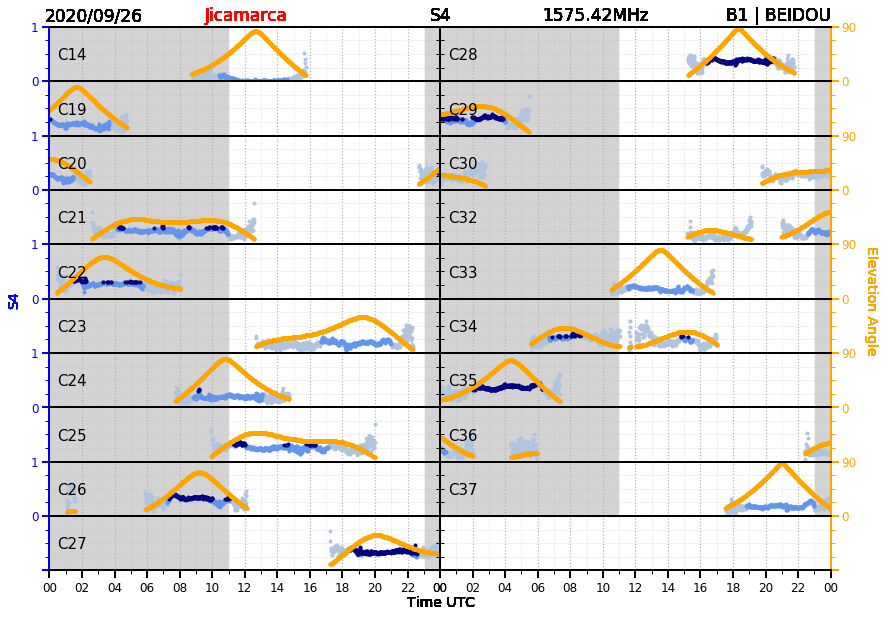

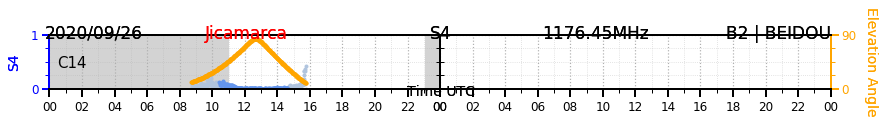

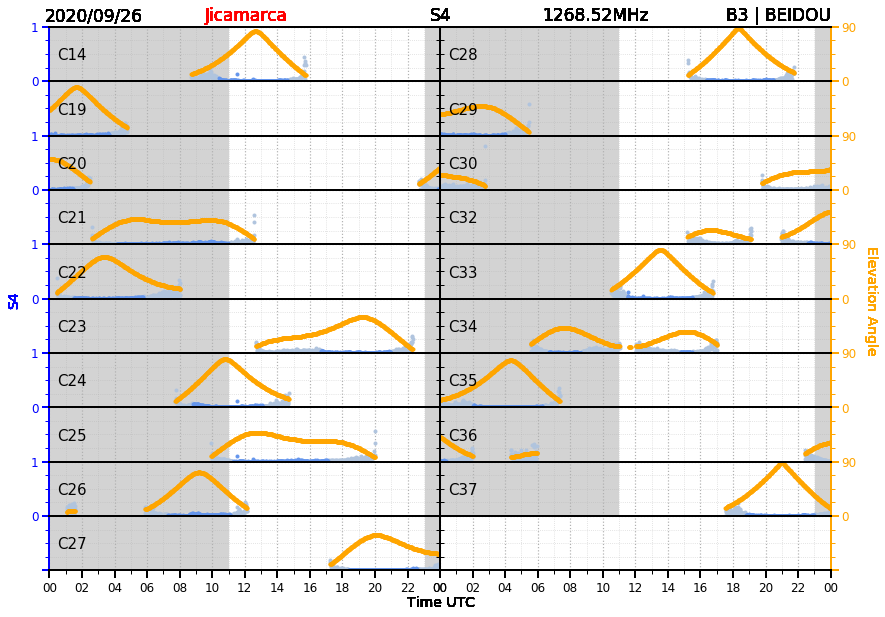

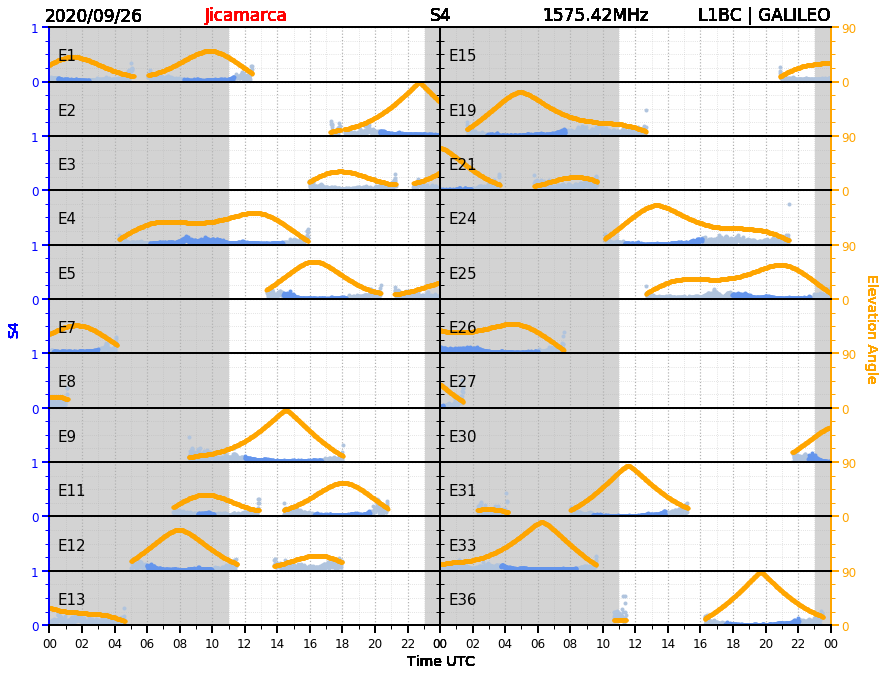

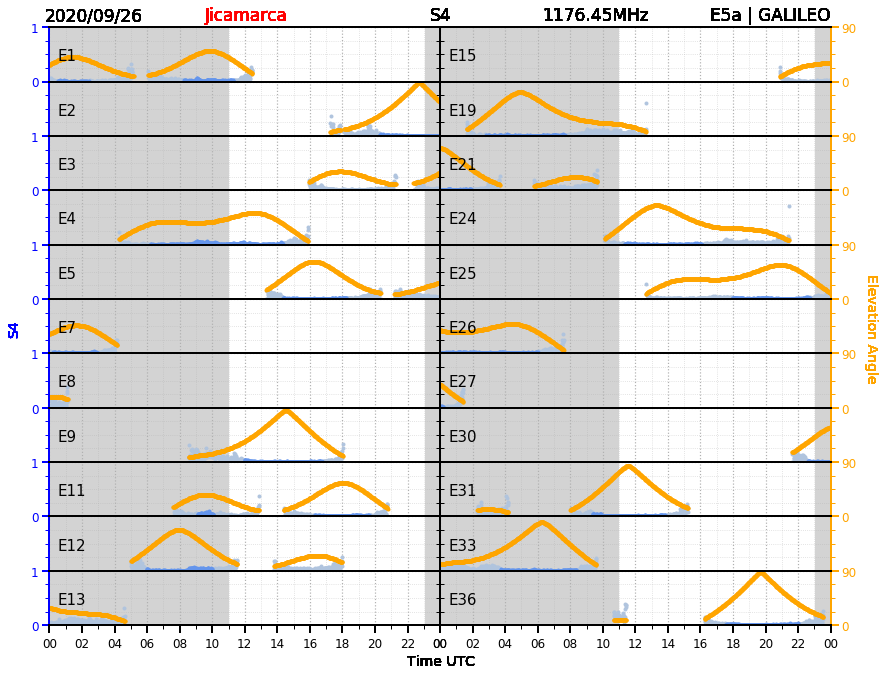

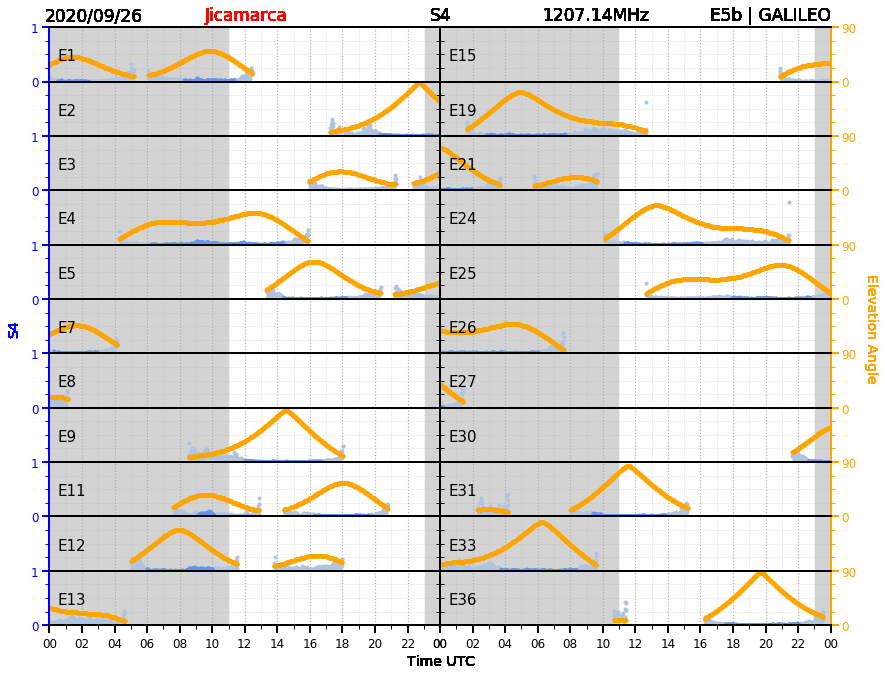

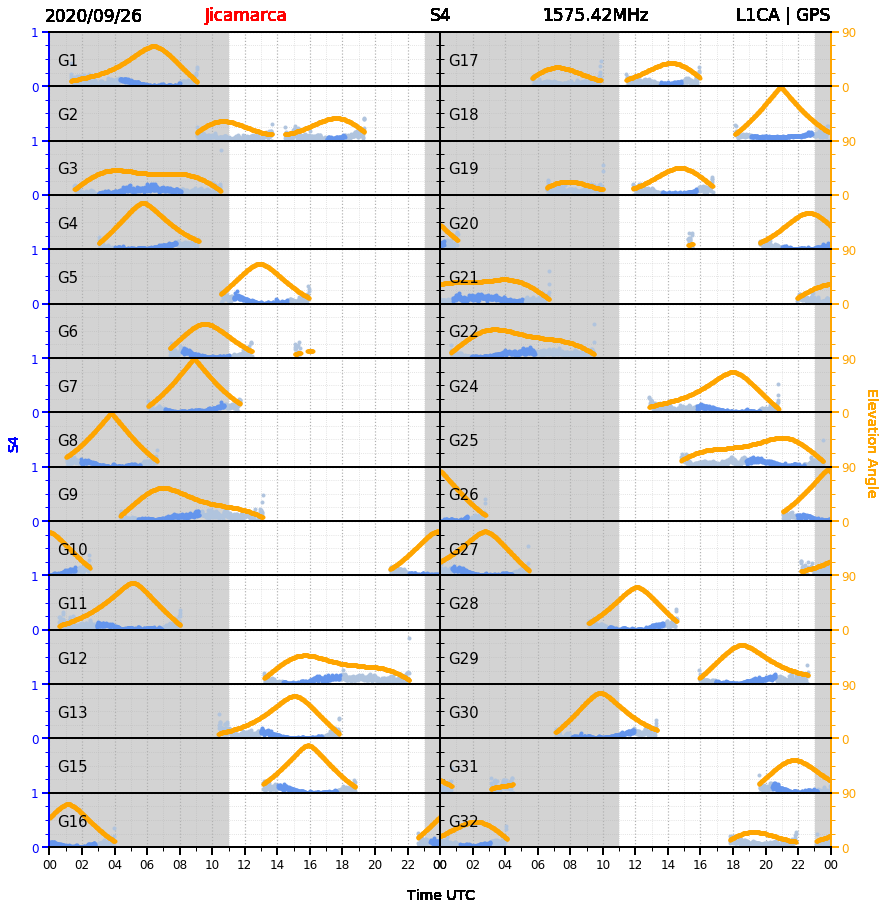

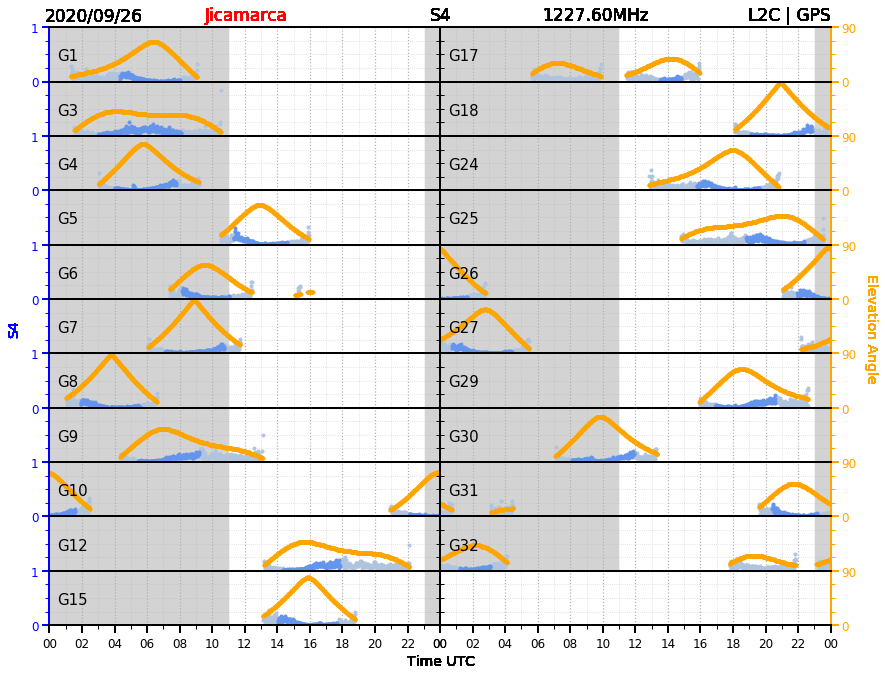

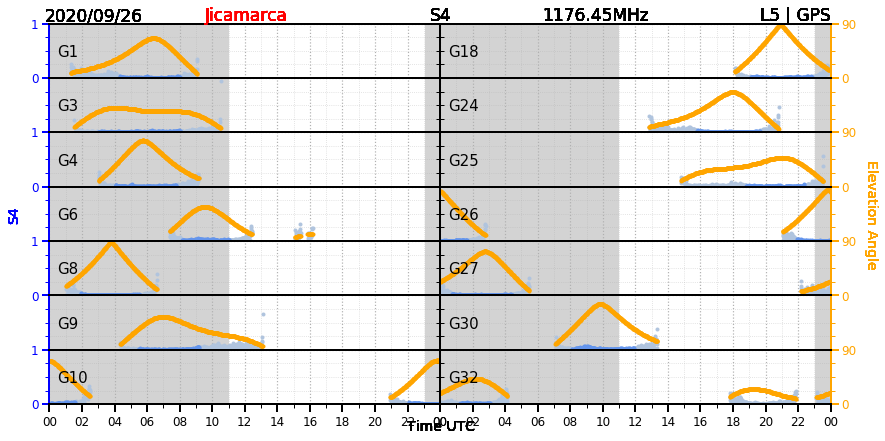

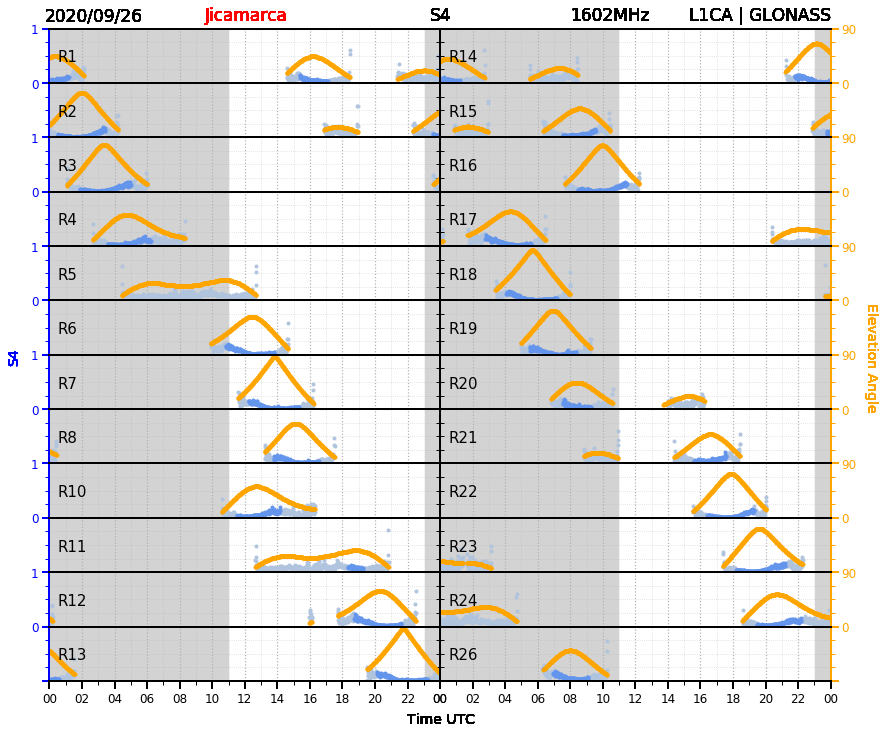

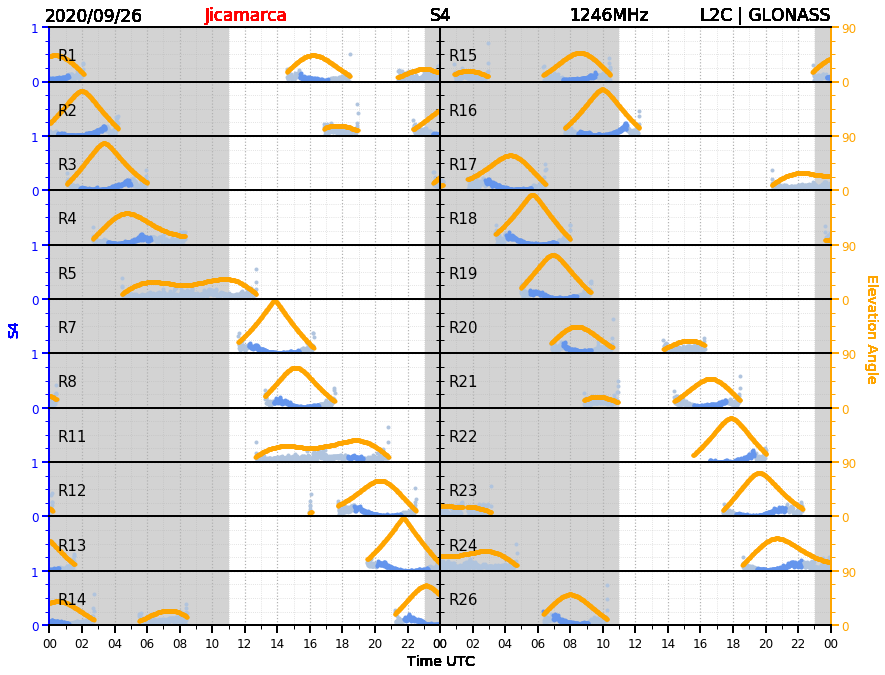

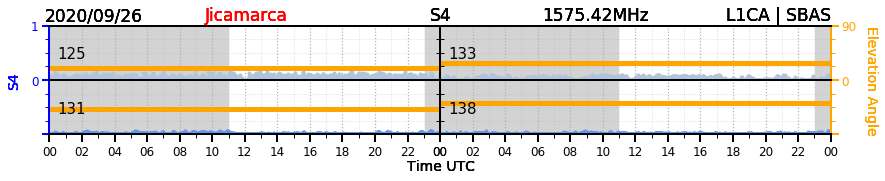

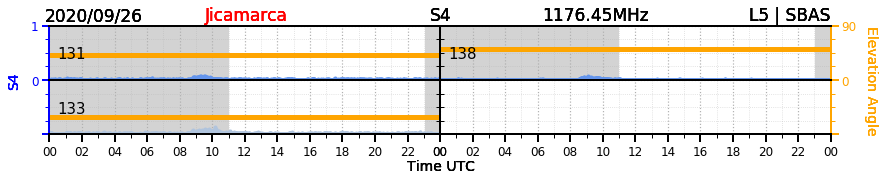

In [54]:
# Plot for each PRN and freq code
#
for prn in prns:
    mask = df2["PRN"].str.contains(prn)
    df3 = df2[mask]
    
    # Check no null columns in the frequencies
    sig_n_aux = ['S4_sig1', 'S4_sig2', 'S4_sig3'] 
    sig_n = []
    for value in sig_n_aux:
        if df3[value].isna().sum() < len(df3):
            sig_n.append(value)
    
    # Iterate for each frequency
    for sig_i in sig_n:
        #
        # Select the available satellites: C1, C2, etc.
        prn_values_aux = df3["PRN"].unique().tolist()
        prn_values_aux.sort(key=lambda x: int(x[1:]))
        i = 0 # prn_values index
        #print(prn_values)
        
        prn_values = []
        # Check no null columns in the satellites
        for value in prn_values_aux:
            mask = df3["PRN"] == value
            df_test = df3[mask]
            if df_test[sig_i].isna().sum() < len(df_test): # when the column is not null 
                prn_values.append(value)
        #print(prn_values)
        
        # Create the figure with the subplots 
        n_rows = (len(prn_values)+1)//2
        n_cols = 2
        fig, axs = plt.subplots(n_rows, n_cols, figsize=(7*n_cols,1*n_rows), sharex="col", sharey="row",
                        gridspec_kw={'hspace': 0, 'wspace': 0})   
        
        for ax in axs.T.reshape(-1): # Plot up to down, rather than left to right 
            # ax -> s4
            # ax2 -> elevation
            ax2 = ax.twinx()
            
            if i < len(prn_values):
                mask = df3["PRN"] == prn_values[i]
                df_aux = df3[mask]
                
                # Plot elevation info
                color2 = "orange"
                df5 = df_aux["Elevation"]
                ax2.plot(df5.index, df5.values, '.', color=color2, linewidth=0.1)
                
                # Plot s4 info
                color1 = "blue" # This color is used in y axis labels, ticks and border  
                colors1 = ["lightsteelblue", "cornflowerblue", "navy"]#["lavender", "cornflowerblue", "midnightblue"] # These colors are used for the plots 
                for k in range(3):
                    idt = "_" + str(k+1)
                    df4 = df_aux[sig_i + idt] # Select the filtered data: S4_sig1_1, S4_sig1_2, S4_sig1_3
                    ax.plot(df4.index, df4.values, '.', color=colors1[k])
                    ax.set_facecolor(color="lightgrey")
                    ax.axvspan(fecha_morning_first, fecha_morning_last, color="white")
                
                # annotate the prn in the subplot
                x_location = fecha2 + pd.Timedelta(minutes=30)
                ax2.text(x_location, 35, convert2SVID(prn_values[i]), fontsize=15, weight='roman') # 0.375
                
            # Set axis limits 
            ax.set_xlim([fecha2, fecha2_tomorrow])
            ax.set_ylim([0,1])
            ax2.set_ylim([0,90])
            
            # Set ticks and tick labels 
            # Set y axis format, labels odds subplots only
            len_half_ax = len(axs.T.reshape(-1))/2
            
            if i >= len_half_ax: # change only for the 2nd column
                j=i-len_half_ax
                
                # Set y labels only to even subplots
                ax.yaxis.set_minor_locator(AutoMinorLocator(4))
                ax.set_yticks([0,1])
                ax2.yaxis.set_minor_locator(AutoMinorLocator(4))
                ax2.set_yticks([0,90])
                
                if j%2 == 0: 
                    ax.set_yticklabels([0,1])
                    ax2.set_yticklabels([0,90])
                else:    
                    ax.set_yticklabels(['',''])
                    ax2.set_yticklabels(['',''])
                    
                # Set yellow color to the right y axis
                for axis in ['top','bottom','left']:
                    ax.spines[axis].set_linewidth(2)
                    ax2.spines[axis].set_linewidth(2)
                
                ax.spines['right'].set_color(color2)
                ax.spines['right'].set_linewidth(2)
                ax2.spines['right'].set_color(color2)
                ax2.spines['right'].set_linewidth(2)
                ax2.tick_params(axis='y', which='both', colors=color2)
                
            else: # apply some changes to the 1st column 
                # remove y tick labels for elevation 
                ax2.yaxis.set_minor_locator(AutoMinorLocator(4))
                ax2.set_yticks([0,90])
                ax2.set_yticklabels(['',''])
                
                # set linewidth to top, bottom and right borders of the subplot
                for axis in ['top','bottom','right']:
                    ax.spines[axis].set_linewidth(2)
                    ax2.spines[axis].set_linewidth(2)
                
                # Set blue color to the left y axis
                ax.spines['left'].set_color(color1)
                ax.spines['left'].set_linewidth(2)
                ax2.spines['left'].set_color(color1)
                ax2.spines['left'].set_linewidth(2)
                ax.tick_params(axis='y', which='both', colors=color1)
                    
            # set x axis format 
            hours = mdates.HourLocator(interval = 2)
            ax.xaxis.set_major_locator(hours) # ticks interval: 2h
            ax.xaxis.set_minor_locator(AutoMinorLocator(2)) # minor tick division: 2
            myFmt = DateFormatter("%H")
            ax.xaxis.set_major_formatter(myFmt) # x format: hours 
            
            # set the ticks style 
            ax.xaxis.set_tick_params(width=2, length=8, which='major', direction='out')
            ax.xaxis.set_tick_params(width=1, length=4, which='minor', direction='out')
            ax.yaxis.set_tick_params(width=2, length=15, which='major', direction='inout')
            ax.yaxis.set_tick_params(width=1, length=4, which='minor', direction='out')
            ax2.yaxis.set_tick_params(width=2, length=15, which='major', direction='inout')
            ax2.yaxis.set_tick_params(width=1, length=4, which='minor', direction='out')
            
            # set the label ticks 
            ax.tick_params(axis='x', which='major', labelsize=12)
            ax.tick_params(axis='y', labelsize=12)
            ax2.tick_params(axis='y', labelsize=12)
            
            # set grid
            ax.grid(which='major', axis='both', ls=':', linewidth=1.2)
            ax.grid(which='minor', axis='both', ls=':', alpha=0.5)
                                    
            # Set title and axis labels 
            aux = get_sig_name(prn, int(sig_i[-1]))
            frequency_name = aux["name"]
            frequency_value = aux["value"] + "MHz"
            
            if prn == 'S': 
                # labels
                fig.text(0.513, -0.1, 'Time UTC', ha='center', va='center', fontsize=14)
                fig.text(0.09, 0.5, 'S4', ha='center', va='center', rotation='vertical', fontsize=14, color=color1)
                fig.text(0.94, 0.5, 'Elevation Angle', ha='center', va='center', rotation=-90, fontsize=14, color=color2)
                # title 
                fig.text(0.513, 0.95, 'S4', ha='center', va='center', fontsize=17, weight='roman')
                fig.text(0.32, 0.95, 'Jicamarca', ha='center', va='center', fontsize=17, weight='roman', color='r')
                fig.text(0.12, 0.95, fecha3, ha='left', va='center', fontsize=17, weight='roman')
                fig.text(0.9, 0.95, f"{frequency_name} | {get_prn_name(prn)}", ha='right', va='center', fontsize=17, weight='roman')
                fig.text(0.72, 0.95, frequency_value, ha='right', va='center', fontsize=17, weight='roman')
                
            else:
                #labels
                fig.text(0.513, 0.08, 'Time UTC', ha='center', va='center', fontsize=14)
                fig.text(0.09, 0.5, 'S4', ha='center', va='center', rotation='vertical', fontsize=14, color='b')
                fig.text(0.94, 0.5, 'Elevation Angle', ha='center', va='center', rotation=-90, fontsize=14, color=color2)
                # title
                fig.text(0.513, 0.895, 'S4', ha='center', va='center', fontsize=17, weight='roman')
                fig.text(0.32, 0.895, 'Jicamarca', ha='center', va='center', fontsize=17, weight='roman', color='r')
                fig.text(0.12, 0.895, fecha3, ha='left', va='center', fontsize=17, weight='roman')
                fig.text(0.9, 0.895, f"{frequency_name} | {get_prn_name(prn)}", ha='right', va='center', fontsize=17, weight='roman')
                fig.text(0.72, 0.895, frequency_value, ha='right', va='center', fontsize=17, weight='roman')
                
            i += 1
        
        # Save figure as pdf
        file_path = "/home/luis/Desktop/Proyects_Files/LISN/GPSs/Tareas/Graficas_cintilaciones/Output_data/test/"
        file_name = f"s4_{get_prn_name(prn)}_{frequency_name}.pdf"
        #plt.savefig(file_path + file_name, bbox_inches='tight')
    